In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pull data: Year, player name, position, points, # of Games
col_list = ["Year", "Player", "Rounded Position", "WS"]
df = pd.read_csv("Resources/NBA_Season_Data_dataworld.csv", usecols=col_list)
df_cleaned = df.drop(df[df['Year'] == 2016].index)
df_cleaned["Rounded Position"] = df_cleaned["Rounded Position"].replace([1.0,2.0,3.0,4.0,5.0],["Point guard","Shooting guard","Small forward","Power Forward","Center"])


df_cleaned

,Year,Player,WS,Rounded Position
0,1978,Truck Robinson,6.5,Power Forward
1,1978,Randy Smith,7.9,Point guard
2,1978,Elvin Hayes,8.3,Power Forward
3,1978,Dave Cowens,10.8,Power Forward
4,1978,Bob McAdoo,10.9,Power Forward
...,...,...,...,...
16854,2015,Jerrelle Benimon,0.0,Center
16855,2015,Sim Bhullar,0.0,Center
16856,2015,Eric Moreland,0.0,Center
16857,2015,Malcolm Lee,0.0,Shooting guard


In [3]:
# Groupby dataset by year and position
# get the average of WS of each position in each year
avg_WS_of_each_pos= df_cleaned.groupby(["Year","Rounded Position"]).agg({'WS': ['mean']})
WS_Analysis = avg_WS_of_each_pos.reset_index()
WS_Analysis.columns = WS_Analysis.columns.map('|'.join).str.strip('|')
WS_Analysis

,Year,Rounded Position,WS|mean
0,1978,Center,4.930000
1,1978,Point guard,2.290909
2,1978,Power Forward,3.092537
3,1978,Shooting guard,2.893333
4,1978,Small forward,2.353571
...,...,...,...
185,2015,Center,3.159596
186,2015,Point guard,2.160833
187,2015,Power Forward,2.164463
188,2015,Shooting guard,1.453043


In [4]:
# generate the list of position
position_name = WS_Analysis.iloc[:,1].unique()
positions = position_name.tolist()
positions

['Center', 'Point guard', 'Power Forward', 'Shooting guard', 'Small forward']

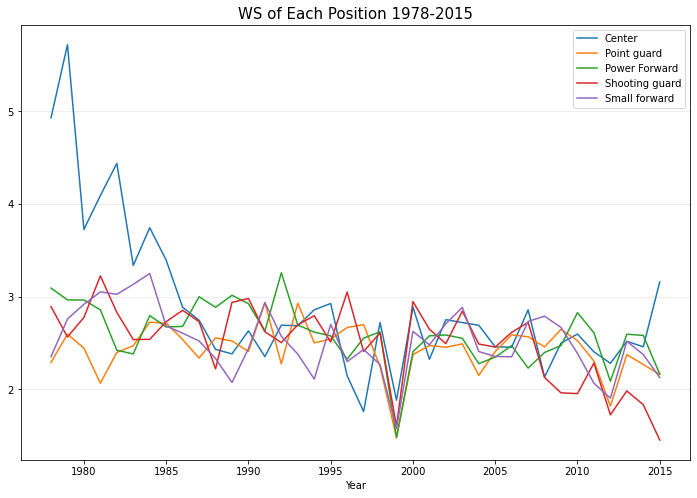

<Figure size 432x288 with 0 Axes>

In [5]:
# Line Plot
fig , ax = plt.subplots(figsize = (12,8))

for position , group in WS_Analysis.groupby('Rounded Position'):
    group.plot(x='Year',y='WS|mean',ax =ax, label=position)

ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.set_title('WS of Each Position 1978-2015', size = 15)
plt.show()
plt.savefig('output_images/WS_Position')

In [6]:
#group_by_year_df = WS_Analysis.groupby(['Year'], sort=False)['WS|mean'].max()
most_valuable_position = WS_Analysis.groupby(['Year'])['WS|mean'].transform(max) == WS_Analysis['WS|mean']
MVPosition_by_year = WS_Analysis[most_valuable_position]
MVPosition_by_year

,Year,Rounded Position,WS|mean
0,1978,Center,4.930000
5,1979,Center,5.720000
10,1980,Center,3.726316
15,1981,Center,4.091667
20,1982,Center,4.439130
25,1983,Center,3.337500
30,1984,Center,3.744444
35,1985,Center,3.394286
40,1986,Center,2.886047
47,1987,Power Forward,3.000000


In [7]:
summary_statistics_aggMethod = WS_Analysis.groupby('Rounded Position').agg({'Rounded Position': ['count'],'WS|mean': ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics_aggMethod

Rounded Position   WS|mean                                \
                            count      mean    median       var       std   
Rounded Position                                                            
Center                         38  2.886706  2.692262  0.656514  0.810255   
Point guard                    38  2.431975  2.464518  0.072717  0.269660   
Power Forward                  38  2.594866  2.590936  0.105983  0.325550   
Shooting guard                 38  2.504343  2.587784  0.174577  0.417824   
Small forward                  38  2.521367  2.499000  0.122752  0.350360   

                            
                       sem  
Rounded Position            
Center            0.131441  
Point guard       0.043745  
Power Forward     0.052811  
Shooting guard    0.067780  
Small forward     0.056836

In [8]:
for position in positions:
    print(f'For {position} position:')
    quartiles = WS_Analysis["WS|mean"].quantile([0.25,0.5,0.75])
    
    first_quartile = quartiles[0.25]
    print(f'The first quartile is: {first_quartile}')
    
    second_quartile = quartiles[0.5]
    print(f'The second quartile is: {second_quartile}')
    
    third_quartile = quartiles[0.75]
    print(f'The third quartile is: {third_quartile}')
    
    IQR = third_quartile - first_quartile
    print(f'The IQR is: {IQR}')

    
    # Determine outliers using upper and lower bounds
    lower_bound = first_quartile - (1.5*IQR)
    upper_bound = third_quartile + (1.5*IQR)
    print(f'If the value lower than {lower_bound} or higher than {upper_bound}, it is a outlier.' )
    print('-----------------------------')
    

For Center position:
The first quartile is: 2.3749999999999996
The second quartile is: 2.551869192799071
The third quartile is: 2.7508687943262418
The IQR is: 0.3758687943262422
If the value lower than 1.8111968085106362 or higher than 3.314671985815605, it is a outlier.
-----------------------------
For Point guard position:
The first quartile is: 2.3749999999999996
The second quartile is: 2.551869192799071
The third quartile is: 2.7508687943262418
The IQR is: 0.3758687943262422
If the value lower than 1.8111968085106362 or higher than 3.314671985815605, it is a outlier.
-----------------------------
For Power Forward position:
The first quartile is: 2.3749999999999996
The second quartile is: 2.551869192799071
The third quartile is: 2.7508687943262418
The IQR is: 0.3758687943262422
If the value lower than 1.8111968085106362 or higher than 3.314671985815605, it is a outlier.
-----------------------------
For Shooting guard position:
The first quartile is: 2.3749999999999996
The second 

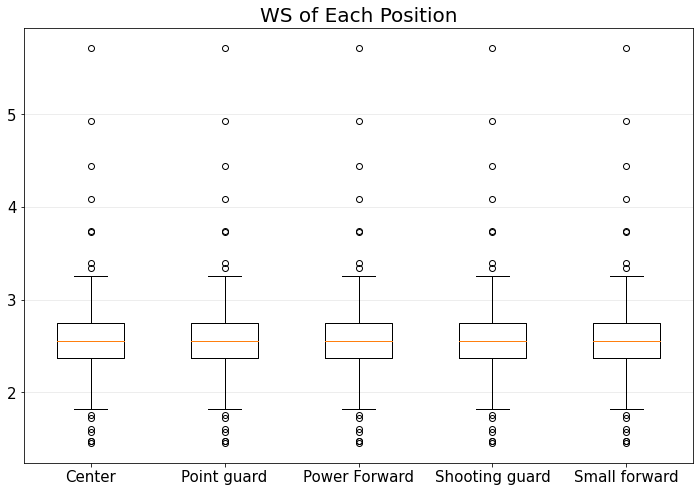

In [9]:
mean_WS_data = []

for position in positions:
    position_played = WS_Analysis.loc[WS_Analysis["Rounded Position"] == position]
    mean_WS_data.append(WS_Analysis["WS|mean"])
    
fig1, ax1 = plt.subplots(figsize=(12, 8))

ax1.set_title('WS of Each Position', size = 20)
ax1.boxplot(mean_WS_data)
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


plt.xticks([1, 2, 3, 4, 5], positions, size=15)
plt.yticks(size = 15)
plt.savefig('output_images/WS_Position_box')
plt.show()